In [32]:
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

mydata = pd.read_csv('vgsales.csv')
df = mydata

In [33]:
print(df.dtypes)

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object


In [34]:
print(df.head())

   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


In [35]:
print(df.describe())

               Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16327.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.406443      0.264667      0.146652      0.077782   
std     4791.853933      5.828981      0.816683      0.505351      0.309291   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4151.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8300.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12449.750000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16598.000000  16598.000000  
mean       0.048063      0.537441  
std        0.188588      1.555028  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.470000  


In [36]:
print(df.loc[: , "JP_Sales"])

0         3.77
1         6.81
2         3.79
3         3.28
4        10.22
         ...  
16593     0.00
16594     0.00
16595     0.00
16596     0.00
16597     0.00
Name: JP_Sales, Length: 16598, dtype: float64


In [37]:
print(df.loc[: , "JP_Sales"].mean())

0.077781660441017


In [38]:
print(Counter(df.loc[: , "Genre"]))

Counter({'Action': 3316, 'Sports': 2346, 'Misc': 1739, 'Role-Playing': 1488, 'Shooter': 1310, 'Adventure': 1286, 'Racing': 1249, 'Platform': 886, 'Simulation': 867, 'Fighting': 848, 'Strategy': 681, 'Puzzle': 582})


<AxesSubplot: >

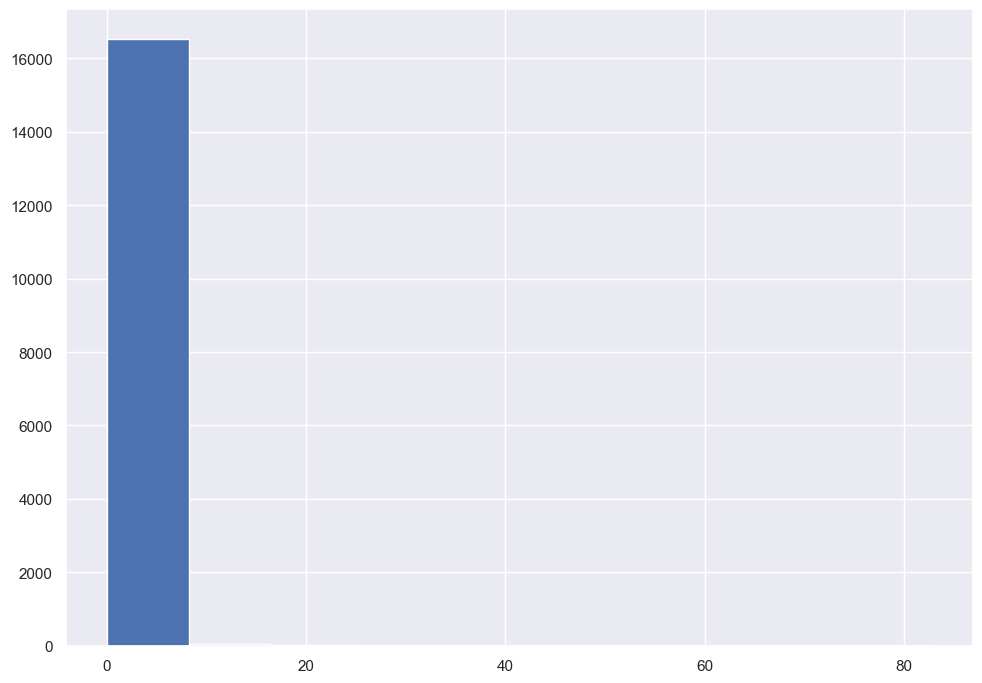

In [39]:
df["Global_Sales"].hist()

<AxesSubplot: ylabel='Density'>

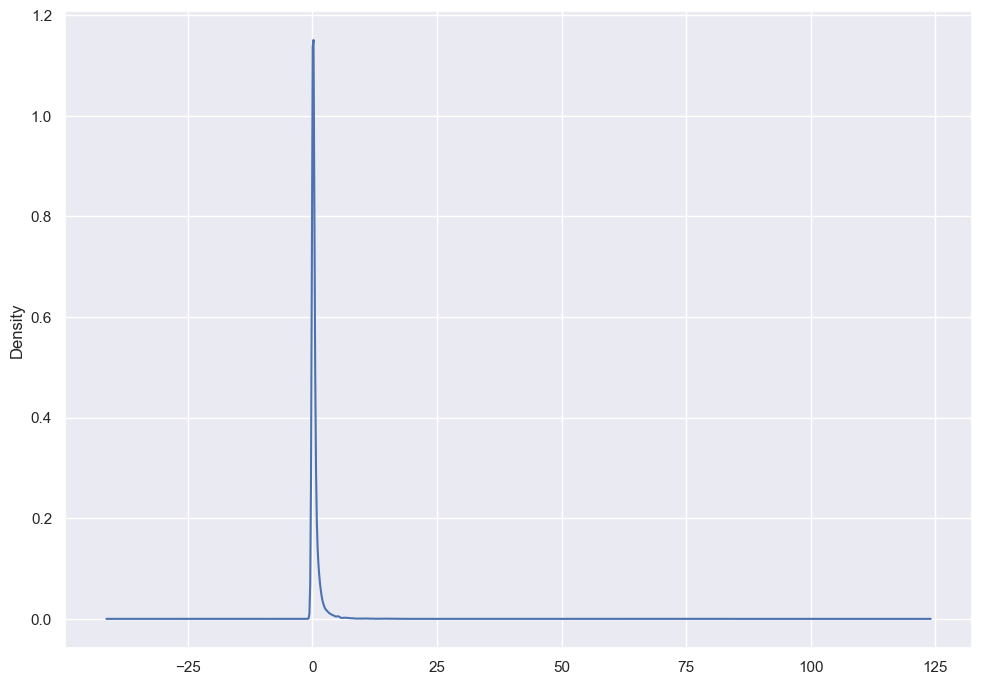

In [40]:
df["Global_Sales"].plot(kind='density')

<AxesSubplot: xlabel='Year'>

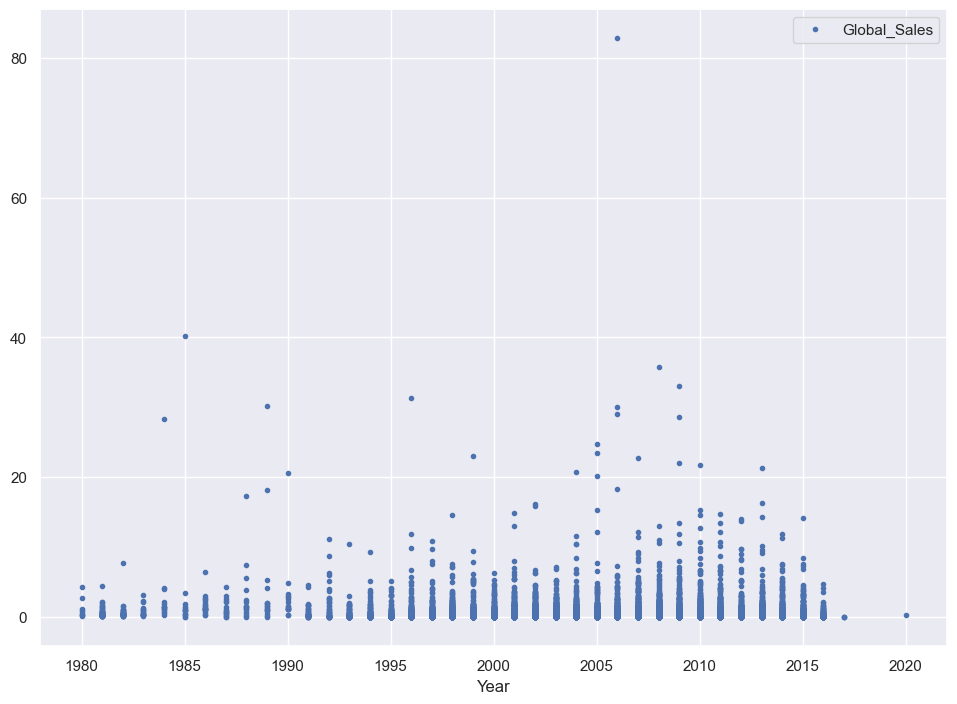

In [41]:
df_temp = df.set_index('Year', inplace=False)
df_temp['Global_Sales'].plot(legend=True, marker='.', linestyle='none')

<AxesSubplot: >

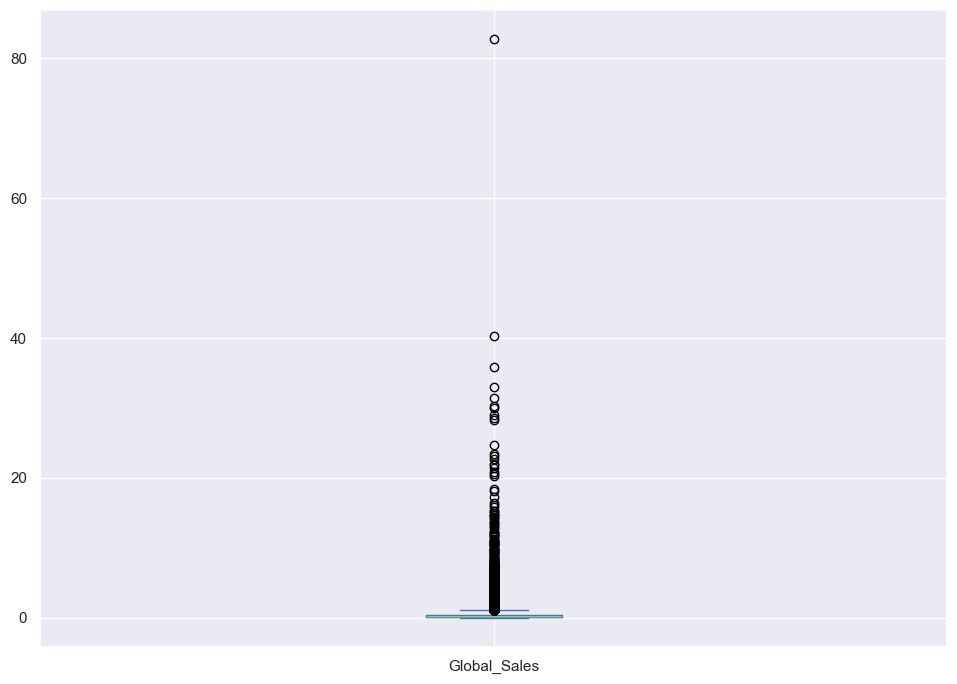

In [42]:
df['Global_Sales'].plot(kind='box')

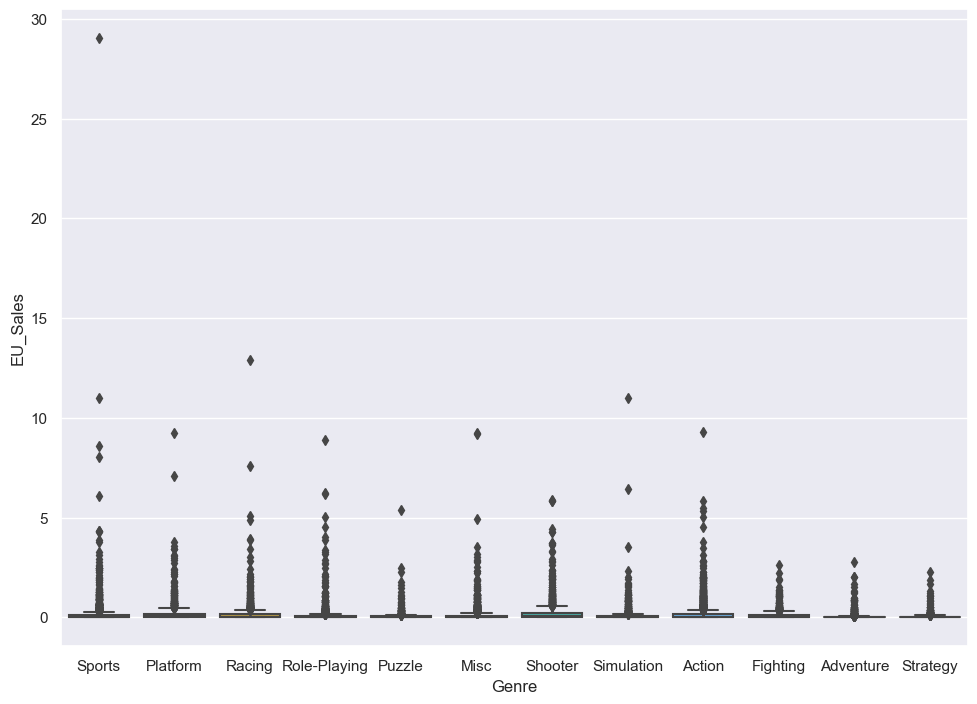

In [43]:
sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.boxplot(x='Genre', y='EU_Sales', data=df)
plt.show()

In [44]:
df_gs_action = df["Global_Sales"][df["Genre"]== "Action"]
var = np.var(df_gs_action)
print(var)

1.336920636537983


In [45]:
df_gs_strategy = df["Global_Sales"][df["Genre"]== "Strategy"]
var = np.var(df_gs_strategy)
print(var)

0.27094695069227476


In [46]:
df_gs = df["Global_Sales"]
var = np.var(df_gs)
print(var)

2.417966193459794


In [47]:
shapiro_test = stats.shapiro(df["Global_Sales"][df["Genre"] == "Adventure"])
print(shapiro_test)

ShapiroResult(statistic=0.3016362190246582, pvalue=0.0)


In [48]:
shapiro_test = stats.shapiro(df["Global_Sales"][df["Genre"] == "Strategy"])
print(shapiro_test)

ShapiroResult(statistic=0.44188809394836426, pvalue=1.8246307303973443e-41)


In [49]:
shapiro_test = stats.shapiro(df["Global_Sales"])
print(shapiro_test)

ShapiroResult(statistic=0.2726662755012512, pvalue=0.0)


c:\Users\avignero\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [50]:
shapiro_test = stats.shapiro(df["Global_Sales"][:5000])
print(shapiro_test)

ShapiroResult(statistic=0.35665613412857056, pvalue=0.0)


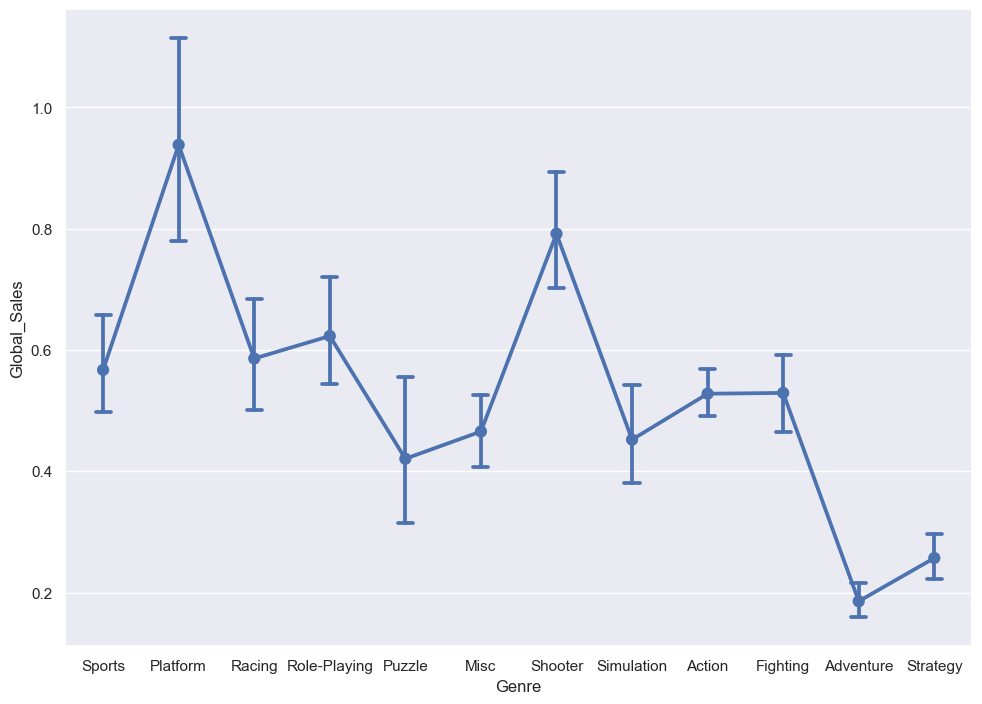

In [51]:
ax = sns.pointplot(x=df["Genre"],y=df["Global_Sales"], data=df, estimator=np.mean, capsize=.2)

In [52]:
df2 = df[df["Year"]>=2014]
print()

In [83]:
unsorted_df = {}
for col in df2["Genre"].unique():
    genremean = df2["Global_Sales"][df2["Genre"] == col].mean()
    unsorted_df[col] = genremean

sorted_df = sorted(unsorted_df.items(), key=lambda item: item[1])
print(sorted_df)

[('Strategy', 0.09457142857142856), ('Adventure', 0.09754601226993867), ('Puzzle', 0.15714285714285708), ('Simulation', 0.32916666666666666), ('Action', 0.33803921568627443), ('Misc', 0.3728571428571428), ('Racing', 0.3977272727272727), ('Role-Playing', 0.4222748815165877), ('Fighting', 0.4791379310344828), ('Platform', 0.500294117647059), ('Sports', 0.663225806451613), ('Shooter', 1.3307079646017699)]


In [85]:
temp = df.sub(df.mean())
df3 = temp.div(temp.std())
print(df3)

        EU_Sales Genre  Global_Sales   JP_Sales   NA_Sales Name  Other_Sales  \
0      57.135209   NaN     52.862433  11.937698  50.478988  NaN    44.604742   
1       6.793984   NaN     25.531734  21.766640  35.283374  NaN     3.828109   
2      25.197026   NaN     22.689341  12.002362  19.083698  NaN    17.296594   
3      21.496629   NaN     20.875869  10.353428  18.961252  NaN    15.440700   
4      17.301527   NaN     19.827656  32.791869  13.475647  NaN     5.047696   
...          ...   ...           ...        ...        ...  ...          ...   
16593  -0.290198   NaN     -0.339184  -0.251484  -0.311831  NaN    -0.254857   
16594  -0.290198   NaN     -0.339184  -0.251484  -0.311831  NaN    -0.254857   
16595  -0.290198   NaN     -0.339184  -0.251484  -0.324076  NaN    -0.254857   
16596  -0.270410   NaN     -0.339184  -0.251484  -0.324076  NaN    -0.254857   
16597  -0.290198   NaN     -0.339184  -0.251484  -0.311831  NaN    -0.254857   

      Platform Publisher      Rank     

C:\Users\avignero\AppData\Local\Temp\ipykernel_2656\2843122045.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  temp = df.sub(df.mean())


In [87]:
print(df.head())

   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  
